In [1]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bin import utils

In [2]:
# fdata = sc.read_h5ad('./RNA/spatial.combined.bin100.h5')
fdata = sc.read_h5ad('./RNA/reclustered.h5')
gdata = sc.read_h5ad('./RNA/spatial.combined.bin100.h5')
gdata = gdata[:, gdata.var_names.str.startswith('sg')].copy()

In [3]:
gdata = utils.combine_guide_replicates(gdata)

/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:78: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [4]:
gdata = gdata[fdata.obs_names, :].copy()

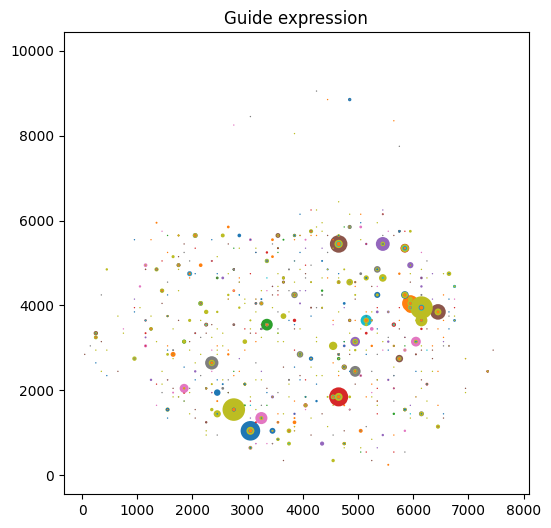

In [16]:
plot_guide_data = gdata[gdata.obs['marker'] == 'B', :].copy()

_, ax = plt.subplots(1, 1, figsize=(6, 6))
for guide in plot_guide_data.var_names:
    sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                    s=plot_guide_data[:, guide].X.flatten(), legend=False, ax=ax)
ax.set_title('Guide expression')
plt.show()

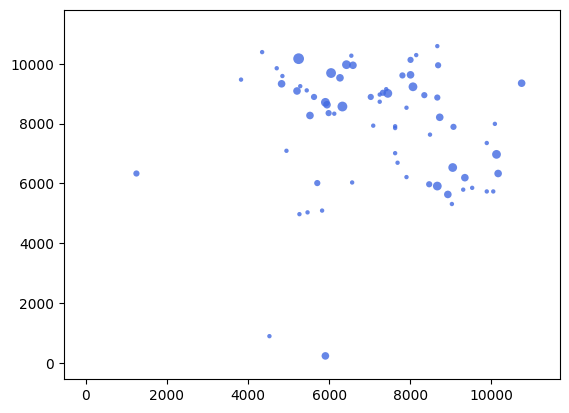

In [21]:
plot_guide_data = gdata[gdata.obs['marker'] == 'A', :].copy()

sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=plot_guide_data[:, 'sgBhlhe40'].X.flatten() * 10, legend=False, alpha=0.8, color='royalblue')
plt.show()

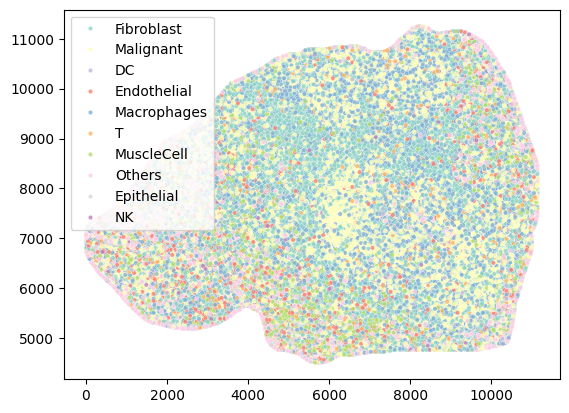

In [29]:
plot_data = fdata[(fdata.obs['marker'] == 'A') &
                  (fdata.obsm['spatial'][:, 1] > 4000), :].copy()

plot_data.obs.annotations = plot_data.obs.annotations.map(lambda x: x.split(' ')[1] if x.endswith('T') else x)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=10, hue=plot_data.obs.annotations.tolist(), legend=True, alpha=0.8, palette='Set3')
plt.show()

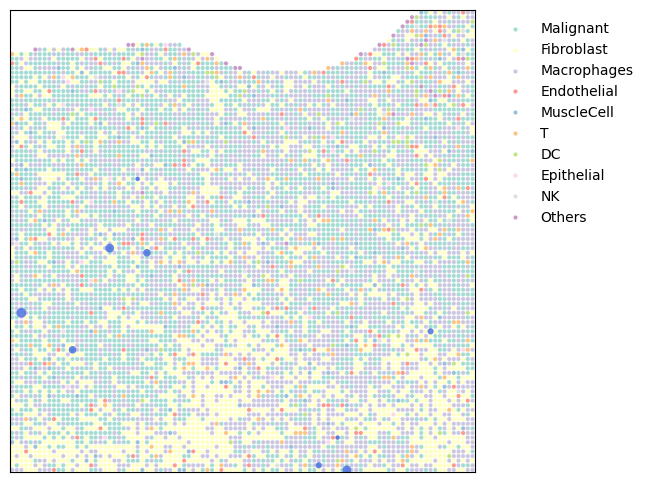

In [35]:
region = [[6000, 8000], [9000, 11000]]
plot_data = fdata[(fdata.obs['marker'] == 'A') &
                  (fdata.obsm['spatial'][:, 1] > region[1][0]) &
                  (fdata.obsm['spatial'][:, 1] < region[1][1]) &
                  (fdata.obsm['spatial'][:, 0] > region[0][0]) &
                  (fdata.obsm['spatial'][:, 0] < region[0][1]), :].copy()
plot_guide_data = gdata[(gdata.obs['marker'] == 'A') &
                         (gdata.obsm['spatial'][:, 1] > region[1][0]) &
                         (gdata.obsm['spatial'][:, 1] < region[1][1]) &
                         (gdata.obsm['spatial'][:, 0] > region[0][0]) &
                         (gdata.obsm['spatial'][:, 0] < region[0][1]), :].copy()

plt.figure(figsize=(6, 6))
plot_data.obs.annotations = plot_data.obs.annotations.map(lambda x: x.split(' ')[1] if x.endswith('T') else x)
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=10, hue=plot_data.obs.annotations.tolist(), legend=True, alpha=0.8, palette='Set3')
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=plot_guide_data[:, 'sgBhlhe40'].X.flatten() * 10, legend=False, alpha=0.8, color='royalblue')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)
plt.xlim(region[0])
plt.ylim(region[1])
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
# up_regulated = ['Ccr8']
up_regulated = ['Ccl1']
# down_regulated = ['Ackr4', 'Ccr4', 'Cxcr2']
down_regulated = ['Ccl2', 'Ccl8', 'Ccl19', 'Ccl25'] + ['Ccl17', 'Ccl22'] + ['Cxcl3']


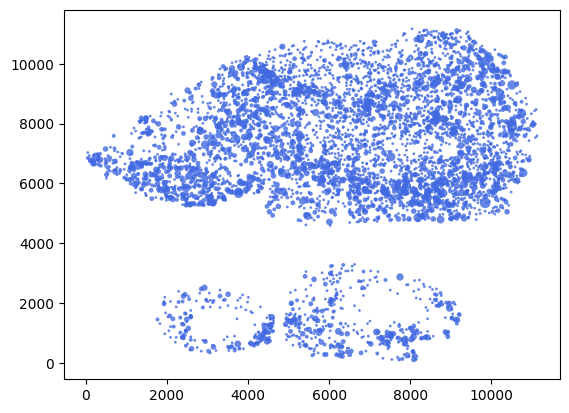

In [7]:
plot_data = fdata[(fdata.obs['marker'] == 'A')]
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, 'Cxcl12'].X.toarray().mean(axis=1).flatten() * 4, c='royalblue', legend=True, alpha=0.8)
plt.show()

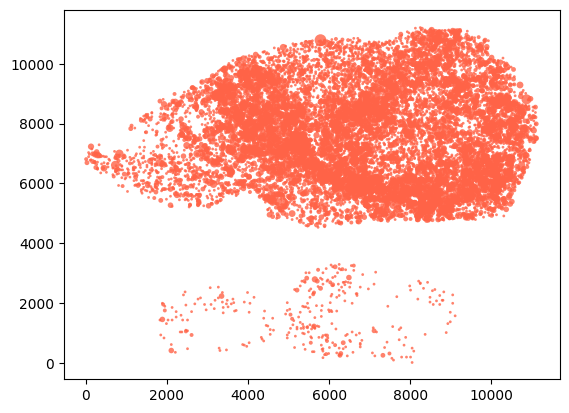

In [8]:
plot_data = fdata[(fdata.obs['marker'] == 'A')]
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, 'Cxcl14'].X.toarray().mean(axis=1).flatten() * 4, c='tomato', legend=True, alpha=0.8)
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/utils.py:105: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scout = method(scout_x, scout_y, **kws)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/utils.py:105: Us

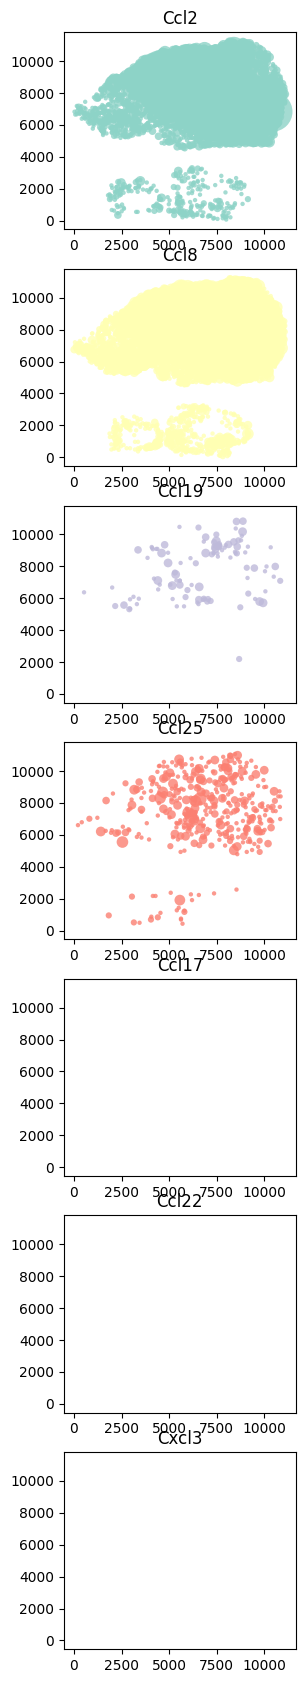

In [38]:
plot_data = fdata[(fdata.obs['marker'] == 'A')]
_, axs = plt.subplots(len(down_regulated), 1, figsize=(3, 3 * len(down_regulated)))
colors = sns.color_palette('Set3', len(down_regulated))
for gene, color, ax in zip(down_regulated, colors, axs):
    sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                    s=plot_data[:, gene].X.toarray().flatten() * 10, c=color, legend=True, alpha=0.8, ax=ax)
    ax.set_title(gene)
plt.show()

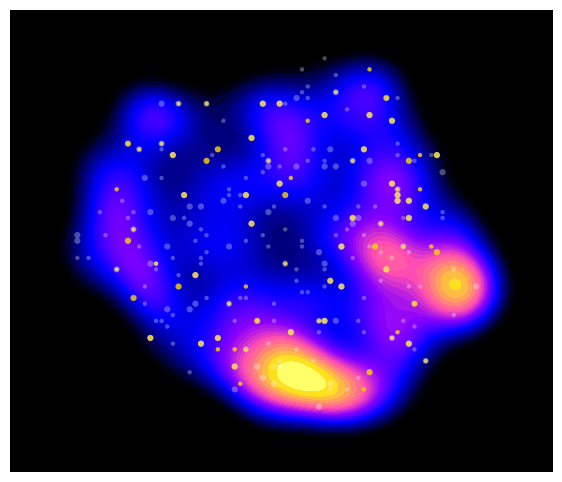

In [121]:
plot_data = fdata[(fdata.obs['marker'] == 'B') &
                  (fdata.obsm['spatial'][:, 1] < 6500)]
plot_guide_data = gdata[(gdata.obs['marker'] == 'B') &
                        (gdata.obsm['spatial'][:, 1] < 6500)]
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                # s=plot_data[:, 'Ccr8'].X.toarray().flatten() * 20, c='royalblue', legend=True, alpha=0.8)
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=plot_data[:, 'Cxcl12'].X.toarray().flatten() * 20, c='tomato', legend=True, alpha=0.8)
plt.figure(figsize=((plot_data.obsm['spatial'][:, 0].max() - plot_data.obsm['spatial'][:, 0].min()) // 1000,
                    (plot_data.obsm['spatial'][:, 1].max() - plot_data.obsm['spatial'][:, 1].min()) // 1000))
plt.gca().set_facecolor('black')
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, 'Cxcl12'].X.toarray().flatten(), cmap='gnuplot2', legend=True, alpha=1, bw_adjust=0.7, levels=50, fill=True)
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[10 * x if x < 2 else 20 for x in plot_guide_data[:, 'sgBhlhe40'].X.flatten()], c='gold', legend=True, alpha=0.8)
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[10 * x if x < 2 else 20 for x in plot_guide_data[:, 'sgNon-targeting'].X.flatten()], c='white', legend=True, alpha=0.3)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.show()


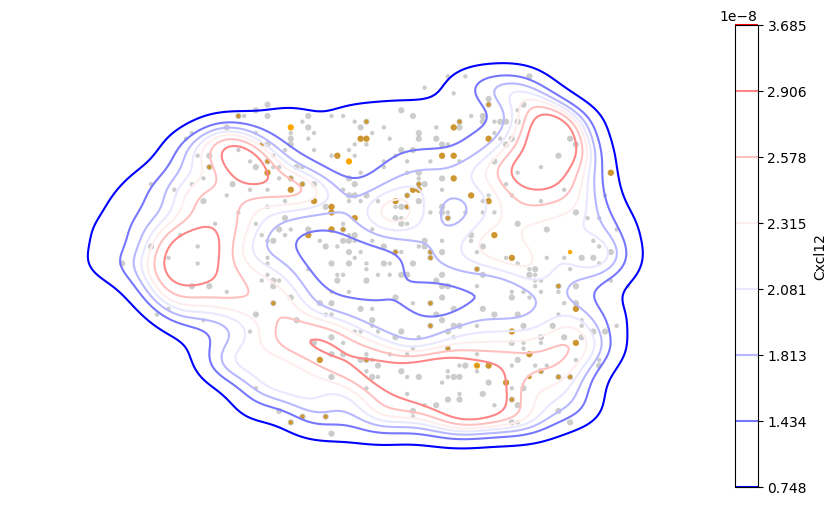

In [5]:
plot_data = fdata[(fdata.obs['marker'] == 'A') &
                  (fdata.obsm['spatial'][:, 1] > 4000)]
plot_guide_data = gdata[(gdata.obs['marker'] == 'A') &
                        (gdata.obsm['spatial'][:, 1] > 4000)]
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                # s=plot_data[:, 'Ccr8'].X.toarray().flatten() * 20, c='royalblue', legend=True, alpha=0.8)
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=plot_data[:, 'Cxcl12'].X.toarray().flatten() * 20, c='tomato', legend=True, alpha=0.8)
plt.figure(figsize=((plot_data.obsm['spatial'][:, 0].max() - plot_data.obsm['spatial'][:, 0].min()) // 1000 + 2,
                    (plot_data.obsm['spatial'][:, 1].max() - plot_data.obsm['spatial'][:, 1].min()) // 1000))
plt.gca().set_facecolor('white')
kde = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, 'Cxcl12'].X.toarray().flatten(), cmap='bwr', legend=True, alpha=1, bw_adjust=0.6, levels=8, fill=False)
plt.colorbar(kde.collections[0], label='Cxcl12')
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[10 * x if x < 2 else 20 for x in plot_guide_data[:, 'sgBhlhe40'].X.flatten()], c='orange', legend=True, alpha=1, edgecolor='dodgerblue')
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[10 * x if x < 2 else 20 for x in plot_guide_data[:, 'sgNon-targeting'].X.flatten()], c='gray', edgecolor='silver', legend=True, alpha=0.4)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/cxcl12_bhlhe40_kde.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [62]:
import statsmodels.api as sm

plot_data = fdata[(fdata.obs['marker'] == 'A') & (fdata.obsm['spatial'][:, 1] > 4000)]
plot_guide_data = gdata[(gdata.obs['marker'] == 'A') & (gdata.obsm['spatial'][:, 1] > 4000)]
# plot_data = fdata[(fdata.obs['marker'] == 'B') & (fdata.obsm['spatial'][:, 1] < 6500)]
# plot_guide_data = gdata[(gdata.obs['marker'] == 'B') & (gdata.obsm['spatial'][:, 1] < 6500)]

# 计算KDE的不同值的位置
kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                             plot_data.obsm['spatial'][:, 1],
                                             plot_data[:, 'Cxcl12'].X.toarray().flatten()],
                      var_type='ccc',  # 'c' for continuous
                      bw='normal_reference')  # 使用默认的带宽选择方法

# 生成网格点
x_grid, y_grid, c_grid = np.meshgrid(np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50),
                             np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50),
                             np.linspace(plot_data[:, 'Cxcl12'].X.toarray().flatten().min(), plot_data[:, 'Cxcl12'].X.toarray().flatten().max(), 50))
grid_coords = np.column_stack([x_grid.ravel(), y_grid.ravel(), c_grid.ravel()])

# 计算KDE值
kde_values = kde.pdf(grid_coords).reshape(x_grid.shape)
kde_values = kde_values.sum(axis=2)
kde_values.mean()

1.3212620979799053e-07

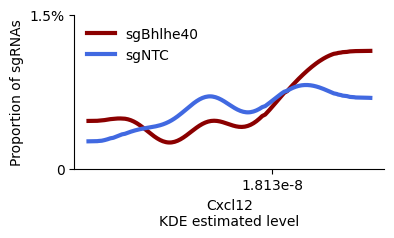

In [76]:
from scipy.ndimage import gaussian_filter1d

kde_df = pd.DataFrame({
    'x': x_grid[:, :, 0].flatten() // 50,
    'y': y_grid[:, :, 0].flatten() // 50,
    'kde': kde_values.flatten()
})
kde_df = kde_df.groupby(['x', 'y']).agg({'kde': 'mean'}).reset_index()
kde_df['level'] = kde_df['kde'].rank() // 10
kde_df['level'] = kde_df['level'].astype(int)

guide_df = pd.DataFrame({
    'x': plot_guide_data.obsm['spatial'][:, 0] // 50,
    'y': plot_guide_data.obsm['spatial'][:, 1] // 50,
    'sgBhlhe40': plot_guide_data[:, 'sgBhlhe40'].X.toarray().flatten(),
    'sgNTC': plot_guide_data[:, 'sgNon-targeting'].X.toarray().flatten()
})
guide_df = guide_df.groupby(['x', 'y']).agg({'sgBhlhe40': 'sum', 'sgNTC': 'sum'}).reset_index()
df = pd.merge(kde_df, guide_df, on=['x', 'y'], how='left')
df = df.dropna().groupby('level').agg({'kde': 'mean', 'sgBhlhe40': 'sum', 'sgNTC': 'sum'}).reset_index()
df['sgBhlhe40'] = df['sgBhlhe40'] / df['sgBhlhe40'].sum()
df['sgNTC'] = df['sgNTC'] / df['sgNTC'].sum()

# 对数据进行平滑处理
df['sgBhlhe40'] = gaussian_filter1d(df['sgBhlhe40'], sigma=18)
df['sgNTC'] = gaussian_filter1d(df['sgNTC'], sigma=18)

from scipy.stats import chi2_contingency

# chi_dict = {}
# cnt_df = df.copy()
# cnt_df['sgBhlhe40'] = cnt_df['sgBhlhe40'] * plot_guide_data[:, 'sgBhlhe40'].X.toarray().flatten().sum()
# cnt_df['sgNTC'] = cnt_df['sgNTC'] * plot_guide_data[:, 'sgNon-targeting'].X.toarray().flatten().sum()
# for i in range(100, df.shape[0]):
#     chi_dict[df.index[i]] = chi2_contingency(cnt_df.loc[cnt_df.index[i-100:i], ['sgBhlhe40', 'sgNTC']].values.reshape(2, -1)).pvalue

# chi_dict[:100] = 1
# cnt_df = pd.concat([df, pd.DataFrame(chi_dict, columns=df.index, index=['pvalue']).T], axis=1)
# cnt_df.columns = ['level', 'kde', 'sgBhlhe40', 'sgNTC', 'pvalue']
# cnt_df = cnt_df[cnt_df['pvalue'] < 0.05]
# cnt_df.pvalue = -np.log2(cnt_df.pvalue)

plt.figure(figsize=(4, 2))
sns.lineplot(data=df, x='level', y='sgBhlhe40', color='darkred', label='sgBhlhe40', linewidth=3)
sns.lineplot(data=df, x='level', y='sgNTC', color='royalblue', label='sgNTC', linewidth=3)
# sns.lineplot(data=cnt_df, x='level', y='pvalue', color='black', label='pvalue', linewidth=1)
plt.legend(frameon=False)
plt.xlabel('Cxcl12\nKDE estimated level')
# plt.xticks([])
plt.yticks([0, 0.015, 0.03], ['0', '1.5%', '3%'])
plt.xticks([181], ['1.813e-8'])
# plt.ylabel('Proportion')
plt.ylabel('Proportion of sgRNAs')
plt.ylim(0, 0.015)
sns.despine()

# print(cnt_df)

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/cxcl12_bhlhe40_proportion.pdf', bbox_inches='tight', format='pdf')
plt.show()


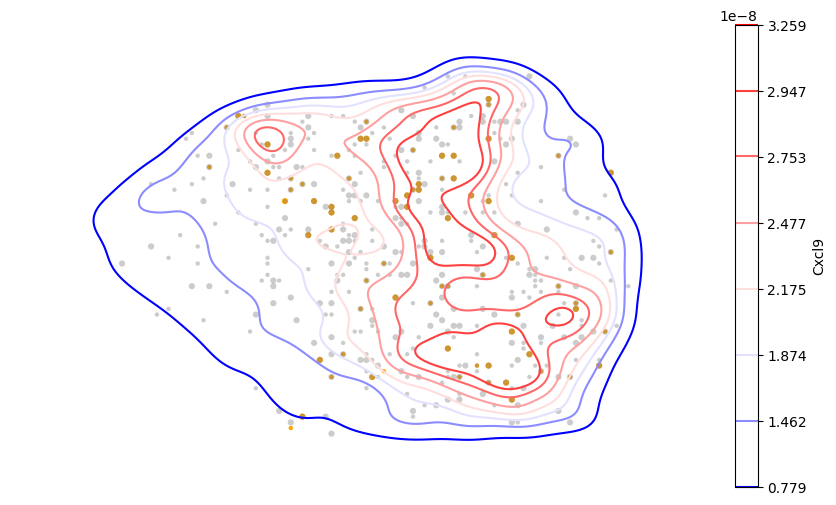

In [25]:
plot_data = fdata[(fdata.obs['marker'] == 'A') &
                  (fdata.obsm['spatial'][:, 1] > 4000)]
plot_guide_data = gdata[(gdata.obs['marker'] == 'A') &
                        (gdata.obsm['spatial'][:, 1] > 4000)]
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                # s=plot_data[:, 'Ccr8'].X.toarray().flatten() * 20, c='royalblue', legend=True, alpha=0.8)
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=plot_data[:, 'Cxcl12'].X.toarray().flatten() * 20, c='tomato', legend=True, alpha=0.8)
plt.figure(figsize=((plot_data.obsm['spatial'][:, 0].max() - plot_data.obsm['spatial'][:, 0].min()) // 1000 + 2,
                    (plot_data.obsm['spatial'][:, 1].max() - plot_data.obsm['spatial'][:, 1].min()) // 1000))
plt.gca().set_facecolor('white')
chemo = ['Cxcl9']
kde = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, chemo].X.toarray().sum(axis=1).flatten(), cmap='bwr', legend=True, alpha=1, bw_adjust=0.6, levels=8, fill=False)
plt.colorbar(kde.collections[0], label='Cxcl9')
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[10 * x if x < 2 else 20 for x in plot_guide_data[:, 'sgCxcr3'].X.flatten()], c='orange', legend=True, alpha=1, edgecolor='dodgerblue')
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[10 * x if x < 2 else 20 for x in plot_guide_data[:, 'sgNon-targeting'].X.flatten()], c='gray', edgecolor='silver', legend=True, alpha=0.4)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/cxcl12_bhlhe40_kde.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [26]:
import statsmodels.api as sm

plot_data = fdata[(fdata.obs['marker'] == 'A') & (fdata.obsm['spatial'][:, 1] > 4000)]
plot_guide_data = gdata[(gdata.obs['marker'] == 'A') & (gdata.obsm['spatial'][:, 1] > 4000)]
# plot_data = fdata[(fdata.obs['marker'] == 'B') & (fdata.obsm['spatial'][:, 1] < 6500)]
# plot_guide_data = gdata[(gdata.obs['marker'] == 'B') & (gdata.obsm['spatial'][:, 1] < 6500)]

# 计算KDE的不同值的位置
kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                             plot_data.obsm['spatial'][:, 1],
                                             plot_data[:, chemo].X.toarray().sum(axis=1).flatten()],
                      var_type='ccc',  # 'c' for continuous
                      bw='normal_reference')  # 使用默认的带宽选择方法

# 生成网格点
x_grid, y_grid, c_grid = np.meshgrid(np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50),
                             np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50),
                             np.linspace(plot_data[:, chemo].X.toarray().sum(axis=1).flatten().min(), plot_data[:, chemo].X.toarray().sum(axis=1).flatten().max(), 50))
grid_coords = np.column_stack([x_grid.ravel(), y_grid.ravel(), c_grid.ravel()])

# 计算KDE值
kde_values = kde.pdf(grid_coords).reshape(x_grid.shape)
kde_values = kde_values.sum(axis=2)
kde_values.mean()

1.2875577599592934e-07

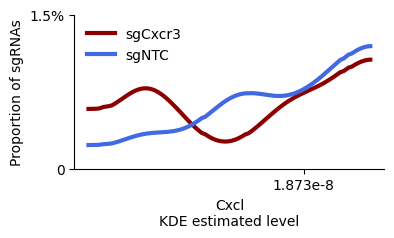

In [27]:
from scipy.ndimage import gaussian_filter1d

kde_df = pd.DataFrame({
    'x': x_grid[:, :, 0].flatten() // 50,
    'y': y_grid[:, :, 0].flatten() // 50,
    'kde': kde_values.flatten()
})
kde_df = kde_df.groupby(['x', 'y']).agg({'kde': 'mean'}).reset_index()
kde_df['level'] = kde_df['kde'].rank() // 10
kde_df['level'] = kde_df['level'].astype(int)

guide_df = pd.DataFrame({
    'x': plot_guide_data.obsm['spatial'][:, 0] // 50,
    'y': plot_guide_data.obsm['spatial'][:, 1] // 50,
    'sgCxcr3': plot_guide_data[:, 'sgCxcr3'].X.toarray().flatten(),
    'sgNTC': plot_guide_data[:, 'sgNon-targeting'].X.toarray().flatten()
})
guide_df = guide_df.groupby(['x', 'y']).agg({'sgCxcr3': 'sum', 'sgNTC': 'sum'}).reset_index()
df = pd.merge(kde_df, guide_df, on=['x', 'y'], how='left')
df = df.dropna().groupby('level').agg({'kde': 'mean', 'sgCxcr3': 'sum', 'sgNTC': 'sum'}).reset_index()
df['sgCxcr3'] = df['sgCxcr3'] / df['sgCxcr3'].sum()
df['sgNTC'] = df['sgNTC'] / df['sgNTC'].sum()

# 对数据进行平滑处理
df['sgCxcr3'] = gaussian_filter1d(df['sgCxcr3'], sigma=18)
df['sgNTC'] = gaussian_filter1d(df['sgNTC'], sigma=18)

from scipy.stats import chi2_contingency

# chi_dict = {}
# cnt_df = df.copy()
# cnt_df['sgBhlhe40'] = cnt_df['sgBhlhe40'] * plot_guide_data[:, 'sgBhlhe40'].X.toarray().flatten().sum()
# cnt_df['sgNTC'] = cnt_df['sgNTC'] * plot_guide_data[:, 'sgNon-targeting'].X.toarray().flatten().sum()
# for i in range(100, df.shape[0]):
#     chi_dict[df.index[i]] = chi2_contingency(cnt_df.loc[cnt_df.index[i-100:i], ['sgBhlhe40', 'sgNTC']].values.reshape(2, -1)).pvalue

# chi_dict[:100] = 1
# cnt_df = pd.concat([df, pd.DataFrame(chi_dict, columns=df.index, index=['pvalue']).T], axis=1)
# cnt_df.columns = ['level', 'kde', 'sgBhlhe40', 'sgNTC', 'pvalue']
# cnt_df = cnt_df[cnt_df['pvalue'] < 0.05]
# cnt_df.pvalue = -np.log2(cnt_df.pvalue)

plt.figure(figsize=(4, 2))
sns.lineplot(data=df, x='level', y='sgCxcr3', color='darkred', label='sgCxcr3', linewidth=3)
sns.lineplot(data=df, x='level', y='sgNTC', color='royalblue', label='sgNTC', linewidth=3)
# sns.lineplot(data=cnt_df, x='level', y='pvalue', color='black', label='pvalue', linewidth=1)
plt.legend(frameon=False)
plt.xlabel('Cxcl\nKDE estimated level')
# plt.xticks([])
plt.yticks([0, 0.015, 0.03], ['0', '1.5%', '3%'])
plt.xticks([181], ['1.873e-8'])
# plt.ylabel('Proportion')
plt.ylabel('Proportion of sgRNAs')
plt.ylim(0, 0.015)
sns.despine()

# print(cnt_df)

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/cxcl12_bhlhe40_proportion.pdf', bbox_inches='tight', format='pdf')
plt.show()


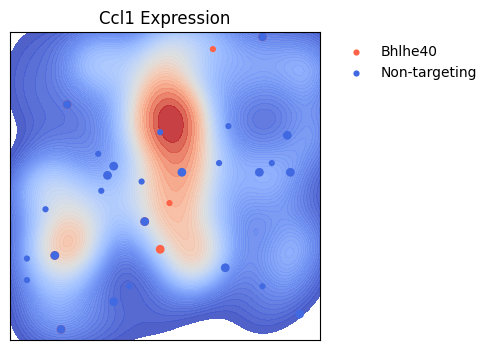

In [13]:
region = [[3000, 5000], [3500, 5500]]
plot_data = fdata[(fdata.obs['marker'] == 'B') &
                  (fdata.obsm['spatial'][:, 0] > region[0][0]) &
                  (fdata.obsm['spatial'][:, 1] > region[1][0]) &
                  (fdata.obsm['spatial'][:, 1] < region[1][1]) &
                  (fdata.obsm['spatial'][:, 0] < region[0][1])]
plot_guide_data = gdata[(gdata.obs['marker'] == 'B') &
                        (gdata.obsm['spatial'][:, 0] > region[0][0]) &
                        (gdata.obsm['spatial'][:, 1] > region[1][0]) &
                        (gdata.obsm['spatial'][:, 1] < region[1][1]) &
                        (gdata.obsm['spatial'][:, 0] < region[0][1])]

plt.figure(figsize=(4, 4))
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, 'Cxcl12'].X.toarray().flatten(), cmap='coolwarm', legend=True, alpha=0.9, bw_adjust=0.7, levels=50, fill=True)
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=plot_data.obs.annotations.map(lambda x: 20 if x.endswith('T') else 0).tolist(), c='purple', legend=False, alpha=0.2)
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=plot_data.obs.annotations.map(lambda x: 20 if x.endswith('phages') else 0).tolist(), c='silver', legend=False, alpha=0.2)
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=plot_data.obs.annotations.map(lambda x: 20 if x.endswith('blast') else 0).tolist(), c='yellow', legend=False, alpha=0.2)
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[20 * x if x < 2 else 40 for x in plot_guide_data[:, 'sgBhlhe40'].X.flatten()], c='tomato', legend=True, alpha=1, label='Bhlhe40')
sns.scatterplot(x=plot_guide_data.obsm['spatial'][:, 0], y=plot_guide_data.obsm['spatial'][:, 1],
                s=[20 * x if x < 2 else 40 for x in plot_guide_data[:, 'sgNon-targeting'].X.flatten()], c='royalblue', legend=True, alpha=1, label='Non-targeting')

plt.title('Ccl1 Expression')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)
plt.xlim(region[0])
plt.ylim(region[1])
plt.xticks([])
plt.yticks([])
plt.show()
